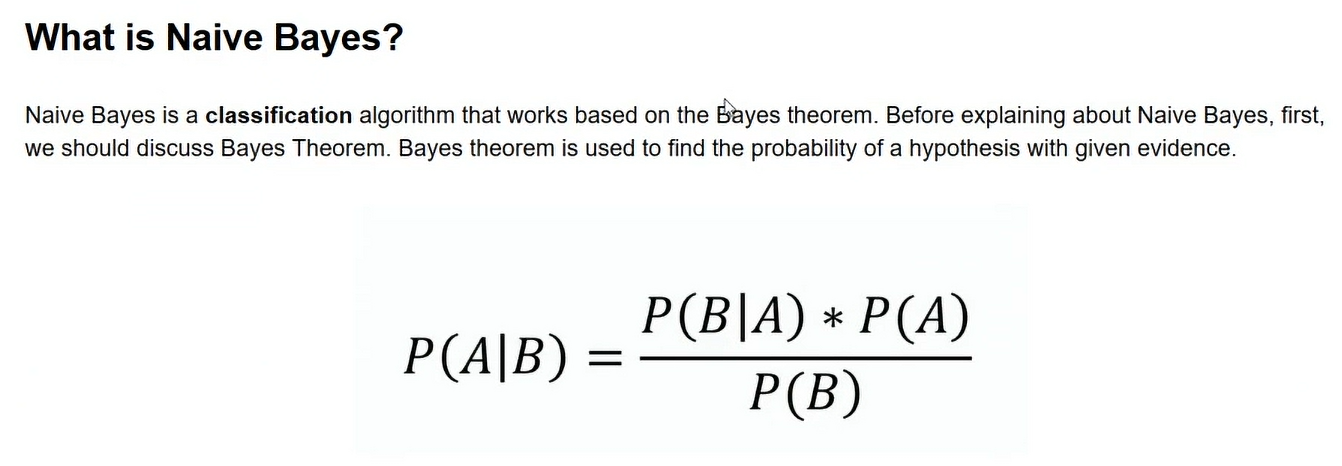
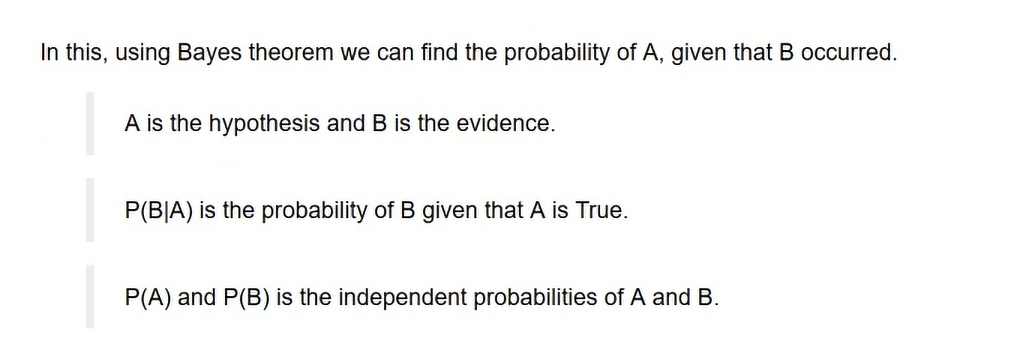
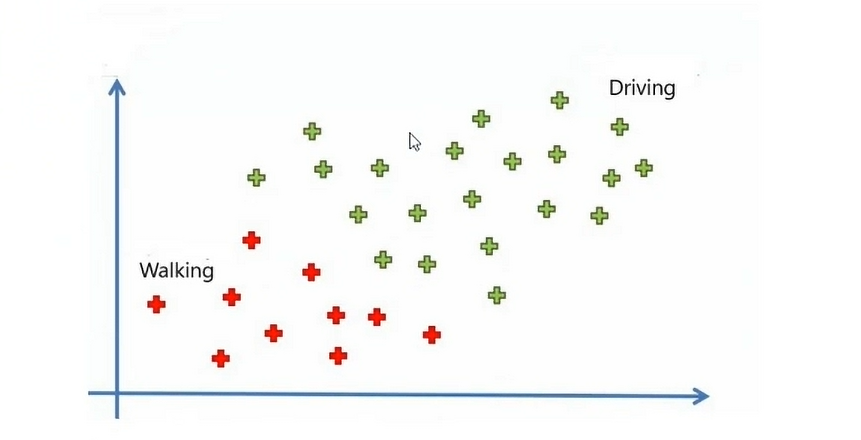
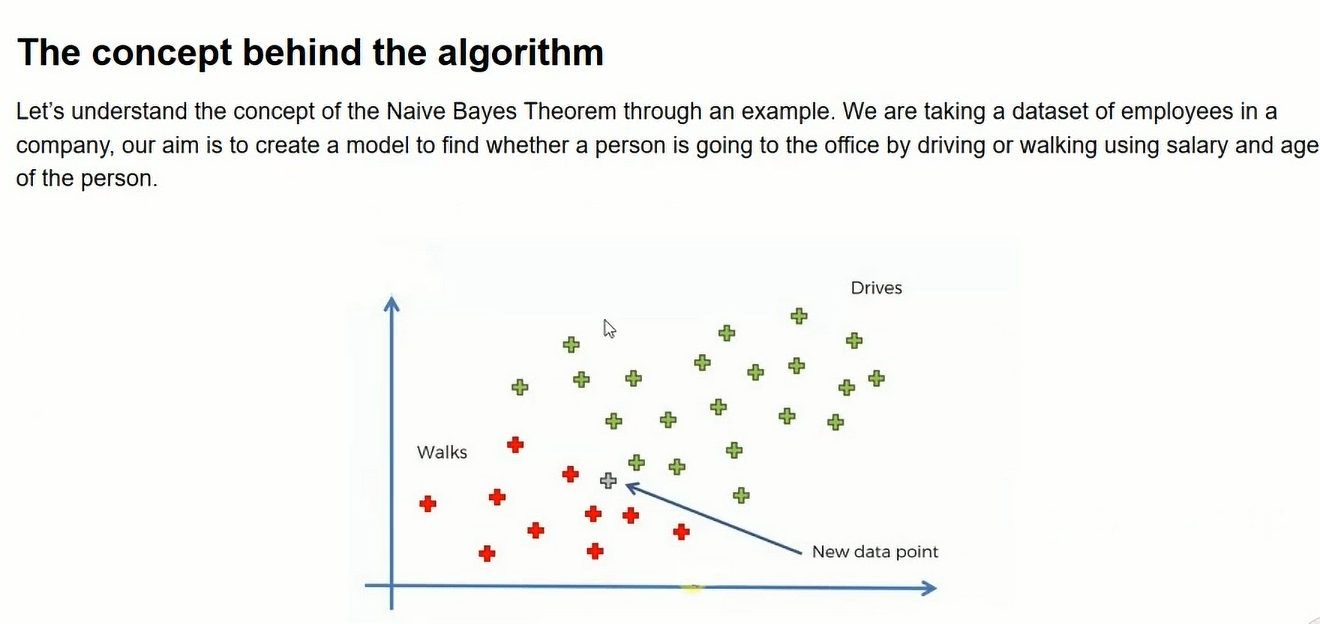
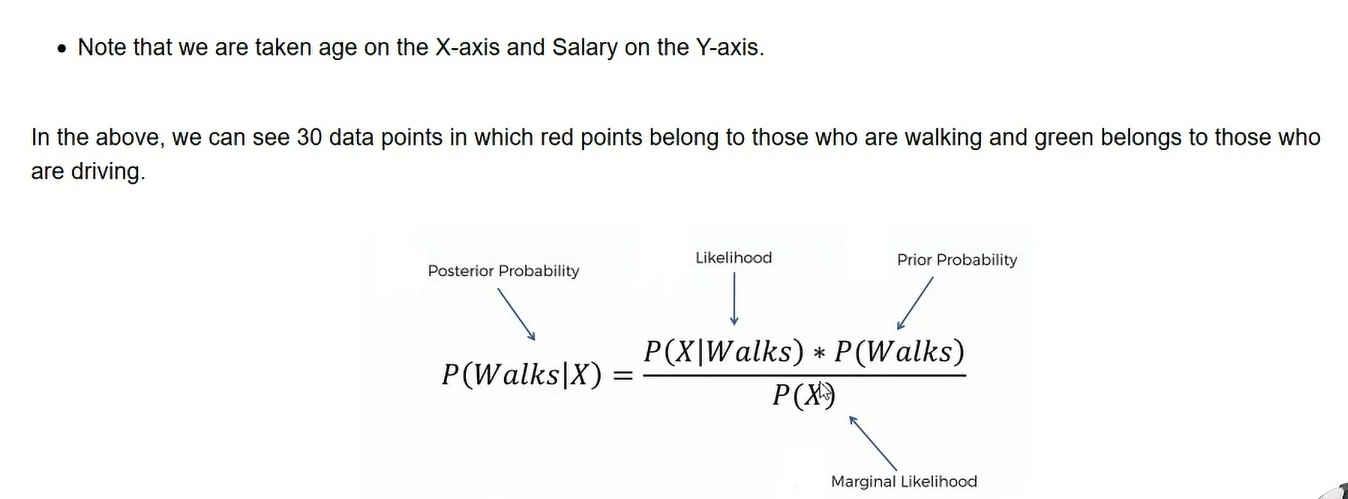
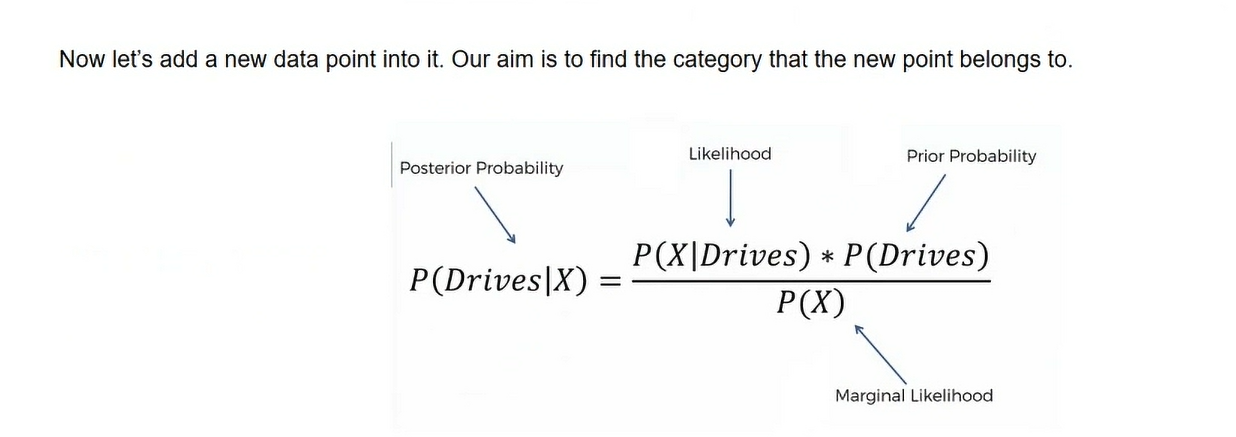


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("social_network_ads.csv")
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
368,15779744,Male,38,71000,0
260,15811177,Female,35,77000,0
263,15767681,Female,35,72000,0
164,15697574,Female,33,69000,0
345,15716781,Female,41,63000,0
70,15756932,Male,25,80000,0
143,15783029,Male,30,89000,0
202,15735549,Female,39,134000,1
69,15595324,Female,31,68000,0
52,15744919,Female,29,83000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
pd.crosstab(df.Gender, df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [7]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


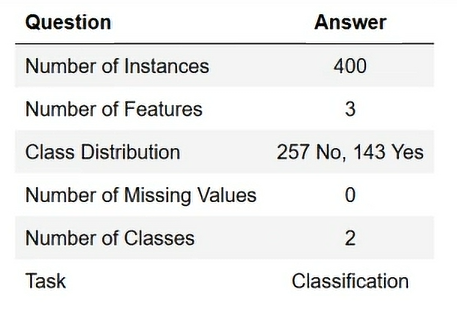

In [9]:
x = df.iloc[:, [1,2,3]]
y = df.iloc[:,-1]

In [10]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mms = MinMaxScaler()
sds = StandardScaler()
x['EstimatedSalary'] = mms.fit_transform(x[['EstimatedSalary']])
x['Age'] = sds.fit_transform(x[['Age']])
x

,Gender,Age,EstimatedSalary
0,1,-1.781797,0.029630
1,1,-0.253587,0.037037
2,0,-1.113206,0.207407
3,0,-1.017692,0.311111
4,1,-1.781797,0.451852
...,...,...,...
395,0,0.797057,0.192593
396,1,1.274623,0.059259
397,0,1.179110,0.037037
398,1,-0.158074,0.133333


In [20]:
from sklearn.model_selection import train_test_split 
x_trian, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [21]:
x_trian

,Gender,Age,EstimatedSalary
303,1,-0.062561,0.474074
349,1,0.032952,0.340741
149,1,-1.686284,0.437037
100,1,-1.017692,0.540741
175,0,-1.399745,0.096296
...,...,...,...
369,0,1.561162,0.081481
320,0,1.370136,0.911111
15,1,-0.826666,0.481481
125,0,0.128465,0.340741


In [22]:
x_test

,Gender,Age,EstimatedSalary
332,1,0.415005,0.370370
111,0,-0.062561,0.414815
352,0,0.415005,0.555556
205,0,0.892570,0.237037
56,0,-1.399745,0.244444
...,...,...,...
304,0,0.223978,0.333333
187,0,-0.444614,0.192593
166,0,-1.495258,0.296296
64,0,2.038728,0.503704


In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_trian, y_train)

GaussianNB()

In [24]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  4],
       [ 3, 25]], dtype=int64)

<AxesSubplot:>

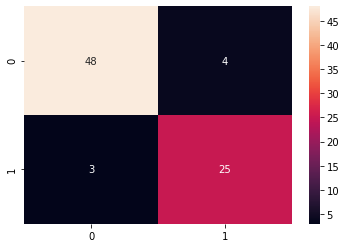

In [27]:
sns.heatmap(cm, annot = True)

In [28]:
ac = accuracy_score(y_test, y_pred)
ac

0.9125